## Problem Statement

### About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

### Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Analytics Vidya Link https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [2]:
#Importing the loan data
import pandas as pd
loan=pd.read_csv('LoanData.csv')

#Sample data 
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## Exploratory Data Analysis  

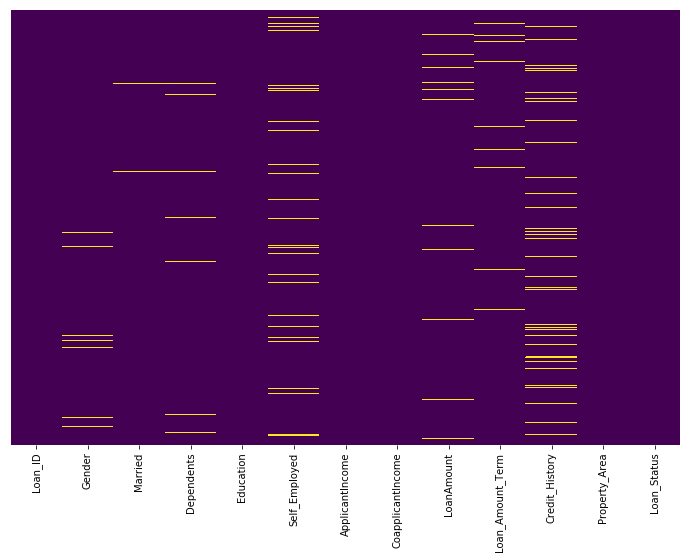

In [3]:
#Checking for missing values in data
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure( figsize = ( 12, 8) )
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It can be seen that Gender, Dependents, Self employed, Loan Amount, Loan Term Amount has missing values. 

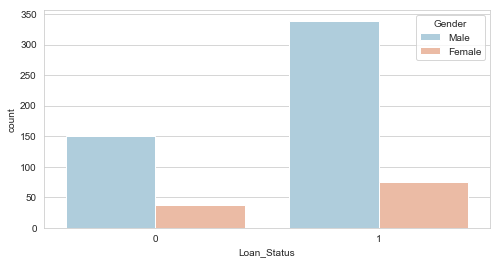

In [19]:
#Gender vs Loan Status 
sns.set_style('whitegrid')
plt.figure( figsize = ( 8, 4) )
sns.countplot(x='Loan_Status', hue='Gender', data=loan, palette='RdBu_r')

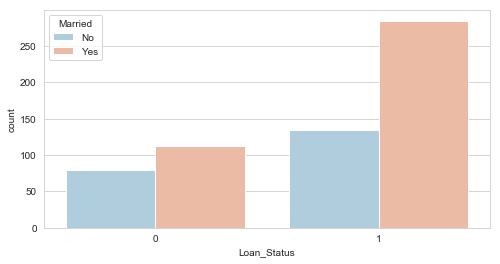

In [18]:
#Married vs Loan Status
sns.set_style('whitegrid')
plt.figure( figsize = ( 8, 4) )
sns.countplot(x='Loan_Status', hue='Married', data=loan, palette='RdBu_r')

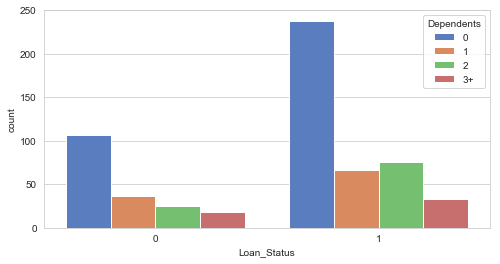

In [20]:
#Dependents vs Loan Status
sns.set_style('whitegrid')
plt.figure( figsize = ( 8, 4) )
sns.countplot(x='Loan_Status', hue='Dependents', data=loan, palette='muted')

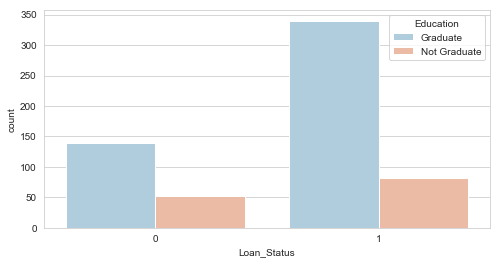

In [21]:
#Education vs Loan Status
sns.set_style('whitegrid')
plt.figure (figsize =(8,4))
sns.countplot(x='Loan_Status', hue='Education', data=loan, palette='RdBu_r')

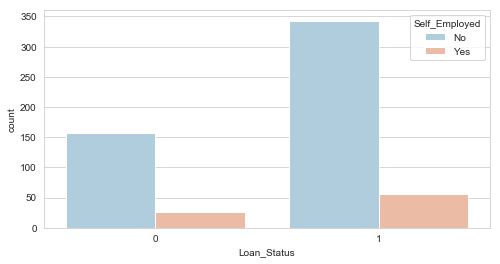

In [22]:
# Self Employed vs Loan Status
sns.set_style('whitegrid')
plt.figure (figsize =(8,4))
sns.countplot(x='Loan_Status', hue='Self_Employed', data=loan, palette='RdBu_r')

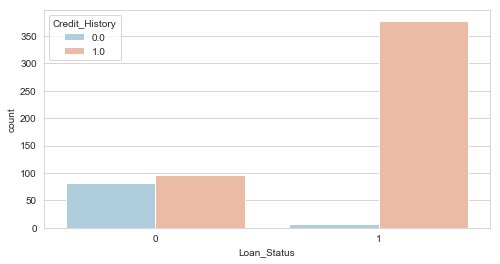

In [24]:
# Credit History vs Loan Status
sns.set_style('whitegrid')
plt.figure (figsize =(8,4))
sns.countplot(x='Loan_Status', hue='Credit_History', data=loan, palette='RdBu_r')

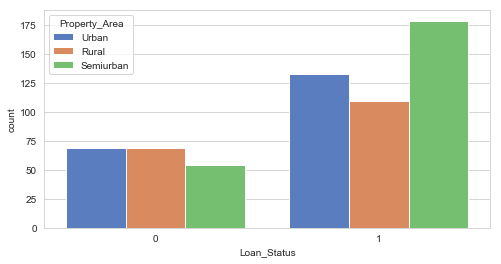

In [25]:
#Property Area vs Loan Status
sns.set_style('whitegrid')
plt.figure (figsize =(8,4))
sns.countplot(x='Loan_Status', hue='Property_Area', data=loan, palette='muted')

## Data Pre-processing 

### Missing Value Treatment 

In [26]:
#Imputing missing values
import statistics

#Replaced numeric value with median
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].median()) 
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].median()) 

#Replaced categorical value with most frequent value  
loan['Gender']=loan['Gender'].fillna(statistics.mode(loan['Gender'])) 
loan['Married']=loan['Married'].fillna(statistics.mode(loan['Married']))
loan['Dependents']=loan['Dependents'].fillna(statistics.mode(loan['Dependents']))
loan['Education']=loan['Education'].fillna(statistics.mode(loan['Education']))
loan['Self_Employed']=loan['Self_Employed'].fillna(statistics.mode(loan['Self_Employed']))
loan['Credit_History']=loan['Credit_History'].fillna(statistics.mode(loan['Credit_History']))

In [28]:
#Checking if the process has imputed the data successfully 
#There are no missing values left
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


### Creating dummy variables 

In [29]:
#Converting categorial features into dummy variables
#First element is dropped to avoid multicollinearity in the dataset 
gender = pd.get_dummies(loan['Gender'],drop_first=True)
married = pd.get_dummies(loan['Married'],drop_first=True)
dependents = pd.get_dummies(loan['Dependents'],drop_first=True)
education = pd.get_dummies(loan['Education'],drop_first=True)
self_employed = pd.get_dummies(loan['Self_Employed'],drop_first=True)
credit_history = pd.get_dummies(loan['Credit_History'],drop_first=True)
property_area = pd.get_dummies(loan['Property_Area'],drop_first=True)

In [30]:
#Dropping the fields for which dummy variables is created 
loan.drop(['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'],axis=1,inplace=True)

#Concatinating the dummy variables created 
loan = pd.concat([loan,gender,married,dependents,education,self_employed,credit_history,property_area],axis=1)

#Dropping the id fiels 
loan.drop(['Loan_ID'], axis=1, inplace=True)

#Final dataset
loan.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban
0,5849,0.0,128.0,360.0,1,1,0,0,0,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,0,1,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1,1,1,0,0,0,0,1,1,0,1
3,2583,2358.0,120.0,360.0,1,1,1,0,0,0,1,0,1,0,1
4,6000,0.0,141.0,360.0,1,1,0,0,0,0,0,0,1,0,1


## Model Development 

In [33]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(loan.drop('Loan_Status', axis=1),loan['Loan_Status'], test_size=0.30,  random_state=0)

In [34]:
#Feature Scaling
#Using standardization to scale the features 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/sumitsinha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sumitsinha/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/sumitsinha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


### Building Artificial Neural Network 

In [37]:
#Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

#Initialising the ANN
#B
classifier = Sequential()

#Adding the input layer and the first hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))

#Adding the second hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))

#Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
429/429 [==============================] - 0s 934us/step - loss: 0.6893 - acc: 0.6713
Epoch 2/100
429/429 [==============================] - 0s 121us/step - loss: 0.6756 - acc: 0.6713
Epoch 3/100
429/429 [==============================] - 0s 108us/step - loss: 0.6421 - acc: 0.6713
Epoch 4/100
429/429 [==============================] - 0s 109us/step - loss: 0.5932 - acc: 0.6713
Epoch 5/100
429/429 [==============================] - 0s 105us/step - loss: 0.5515 - acc: 0.7576
Epoch 6/100
429/429 [==============================] - 0s 130us/step - loss: 0.5282 - acc: 0.7949
Epoch 7/100
429/429 [==============================] - 0s 103us/step - loss: 0.5141 - acc: 0.7995
Epoch 8/100
429/429 [==============================] - 0s 109us/step - loss: 0.5004 - acc: 0.8019
Epoch 9/100
429/429 [==============================] - 0s 121us/step - loss: 0.4886 - acc: 0.8042
Epoch 10/100
429/429 [==============================] - 0s 111us/step 

In [44]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [45]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 24,  27],
       [ 13, 121]])

The accuracy reported on the traning data was 82% but on test data it is 77%. It is clearly visible that model is overfitting on the traning set. We need to apply K-Fold validation. 

### Evaluating the ANN

In [48]:
#Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

In [50]:
mean, variance

(0.78322258816737, 0.06977238252160606)

### ANN Parameter tuning 

In [51]:
#Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
386/386 [==============================] - 0s 774us/step - loss: 0.6918 - acc: 0.6710
Epoch 2/100
386/386 [==============================] - 0s 53us/step - loss: 0.6885 - acc: 0.6736
Epoch 3/100
386/386 [==============================] - 0s 78us/step - loss: 0.6852 - acc: 0.6736
Epoch 4/100
386/386 [==============================] - 0s 63us/step - loss: 0.6804 - acc: 0.6736
Epoch 5/100
386/386 [==============================] - 0s 59us/step - loss: 0.6735 - acc: 0.6736
Epoch 6/100
386/386 [==============================] - 0s 81us/step - loss: 0.6639 - acc: 0.6736
Epoch 7/100
386/386 [==============================] - 0s 64us/step - loss: 0.6508 - acc: 0.6736
Epoch 8/100
386/386 [==============================] - 0s 58us/step - loss: 0.6347 - acc: 0.6736
Epoch 9/100
386/386 [==============================] - 0s 57us/step - loss: 0.6156 - acc: 0.7047
Epoch 10/100
386/386 [==============================] - 0s 55us/step - loss: 0.5964 - acc: 0.7746
Epoch 11/100
386/386 [======

In [53]:
best_parameters, best_accuracy

({'batch_size': 32, 'epochs': 100, 'optimizer': 'rmsprop'}, 0.7902097902097902)